In [ ]:
#
#    Notebook de cours MAP412 - Chapitre 1 - M. Massot 2022-2023 - Ecole polytechnique
#    ----------   
#    Stabilité d'un algorithme
#    
#    Auteurs : L. Séries et M. Massot - (C) 2022
#    

# Stabilité d'un algorithme

## Evaluation d'une fonction (cas mal conditionné)

Nous étudions le conditionnement de la fonction $P(x) = (x − 1)^6,$ dans un premier temps dans un voisinage de la valeur $x_0 = 1$. Il n’est pas compliqué de voir que le conditionnement en $x$ vaut $\kappa(x) = x / \mathcal{P}(x) \sup_{|y-x|<\epsilon_M}\mathcal{P}^\prime(y)$ et vaut donc approximativement $6x/|x-1|$ dans ce voisinage, ce qui veut dire que le problème y est mal conditionné.

Il est proposé d'utiliser trois algorithmes pour évaluer la fonction dans l’intervalle $[0.995 , 1.005]$. Ces trois algorithmes sont basés sur trois formes équivalentes mathématiquement et qui possèdent donc le même conditionnement :
- la forme factorisée $P(x) = (1 − x)^6$
- la forme développée $P(x) = x^6 − 6x^5 + 15x^4 − 20x^3 + 15x^2 − 6x + 1$
- la forme utilisant l’algorithme de Horner $P(x) = ((((((x − 6)x + 15)x − 20)x + 15)x − 6)x + 1)$ 

In [ ]:
def P1(x):
    return (x-1)**6

def P2(x):
    return x**6-6*x**5+15*x**4-20*x**3+15*x**2-6*x+1

def P3(x):
    return ((((((x-6)*x+15)*x-20)*x+15)*x-6)*x+1)

Pour illustrer le comportement de cette évaluation dans le voisinage de 1, la cellule suivante permet de représenter les graphes de la fonction en utilisant les trois algorithmes pour évaluer la fonction.

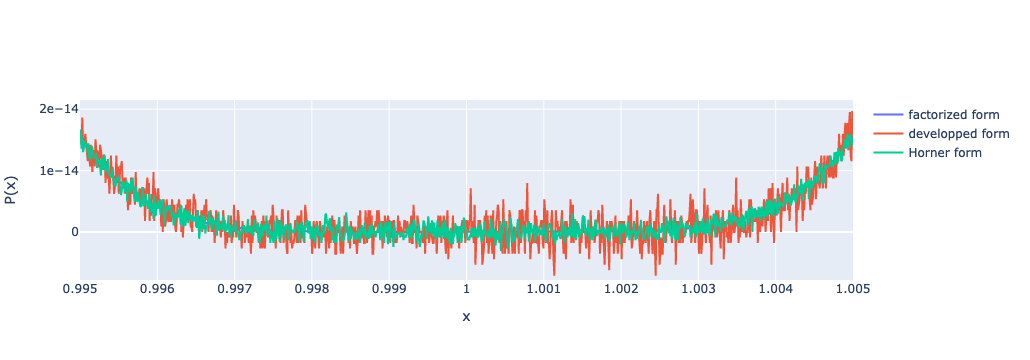

In [6]:
import plotly.graph_objects as go
import numpy as np

xmin = 0.995
xmax = 1.005
x = np.linspace(xmin,xmax, 1000)

vmin = min(np.min(P1(x)), np.min(P2(x)), np.min(P3(x)))
vmax = max(np.max(P1(x)), np.max(P2(x)), np.max(P3(x)))

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=P1(x), name='factorized form'))
fig.add_trace(go.Scatter(x=x, y=P2(x), name='developped form'))
fig.add_trace(go.Scatter(x=x, y=P3(x), name='Horner form'))
fig.update_yaxes(exponentformat='e', range=[1.1*vmin, 1.1*vmax])
fig.update_layout(xaxis_title="x", yaxis_title="P(x)")
fig.show()

Nous constatons que le fait que le problème soit mal conditionné dans cet intervalle peut avoir un impact important sur les erreurs suivant l’algorithme que l’on utilise. La forme développée et Horner donnent un niveau d’erreur relativement presque deux ordres de grandeur plus important que la forme factorisée. Les oscillations sont de plus grande amplitude près de 1 où le conditionnement est mauvais et s’estompent peu à peu lorsque l’on s’en éloigne ce qui semble montrer que les erreurs d’évaluation sont directement reliées au conditionnement.

Le mauvais conditionnement que nous avons identifié implique donc de potentielles difficultés d’évaluation et une forte sensibilité à l’algorithme utilisé. Ceci signifie que le choix de l’algorithme aura d’autant plus d’importance que le problème est mal conditionné et il nous faut donc un outil pour évaluer un algorithme. En conclusion, le conditionnement donne une information importante et intrinsèque au problème mathématique que l’on souhaite résoudre mais l’algorithme utilisé joue aussi un rôle et il nous faut pouvoir l’évaluer.

## Evaluation d'une fonction (cas bien conditionné)

On considère l'évaluation de la fonction $g(x)$ écrite sous deux formes différentes :

$$g_1(x) = \displaystyle \frac{1}{x(x+1)} \quad \text{et} \quad g_2(x) = \displaystyle \frac{1}{x} - \frac{1}{x+1}$$ 

In [ ]:
def g1(x):
    return 1/(x*(x+1))

def g2(x):
    return 1/x - 1/(x+1)

Il est aisé de voir que dans un voisinage de la valeur de $x$ utilisé, toutes les opérations de l’algorithme $g_1$ sont bien conditionnées et l’algorithme est numériquement stable. Par contre, la soustraction dans un voisinage où $1/x ≈ 1/(x + 1)$, est mal conditionnée et l’algorithme $g_2$ est numériquement instable avec une constante potentiellement grande qui va générer une erreur importante.

### Evaluation de la fonction $g(x)$ pour $x = 10000$

In [ ]:
from mpmath import mp

# Evaluation de la valeur de référence en utilisant des flottants quadruple précision
mp.prec = 113
gref = mp.mpf('1/100010000')
print(f"Valeur de réference avec {mp.dps} chiffres significatifs = {gref}")

# simple precision
mp.prec = 24
print(f"\nTaille de la mantisse : {mp.prec} bits")
print(f"Valeur de réference avec {mp.dps} chiffres significatifs : {mp.nstr(gref, mp.dps, strip_zeros=False)}")
# Evaluation des fonctions
x = mp.mpf('10000')
print(f"1ere forme avec {mp.dps} chiffres significatifs : g(x={x}) = {mp.nstr(g1(x), mp.dps, strip_zeros=False)}")
print(f"2eme forme avec {mp.dps} chiffres significatifs : g(x={x}) = {g2(x)}")

# double precision
mp.prec = 53
print(f"\nTaille de la mantisse : {mp.prec} bits")
print(f"Valeur de réference avec {mp.dps} chiffres significatifs : {mp.nstr(gref, mp.dps, strip_zeros=False)}")
# Evaluation des fonctions
x = mp.mpf('10000')
print(f"1ere forme avec {mp.dps} chiffres significatifs : g(x={x}) = {mp.nstr(g1(x), mp.dps, strip_zeros=False)}")
print(f"2eme forme avec {mp.dps} chiffres significatifs : g(x={x}) = {g2(x)}")

Après avoir observé la valeur de référence obtenue avec 33 chiffres significatifs, on utilise d'une part la simple et d'autre part la double précision. Alors que l'algorithme 1 se comporte très bien avec une erreur de l'ordre de l'erreur machine, ce qui indique une très bonne constante de stabilité backward pour ce problème bien conditionné, l'algorithme 2 nous conduit à une perte de 3 à 4 chiffres significatifs (on rappelle que ce problème est lié à la valeur à laquelle on évalue la fonction) indiquant localement un algorithme avec une constante de stabilité backward beaucoup moins favorable comme attendu par le conditionnement de la soustraction de deux nombres très proches.

### Evaluation de la fonction $g(x)$ pour $x = 100000000$

In [ ]:
# Evaluation de la valeur de référence en utilisant des flottants quadruple précision
mp.prec = 113
gref = mp.mpf('1/10000000100000000')
print(f"Valeur de réference avec {mp.dps} chiffres significatifs = {gref}")

# simple precision
mp.prec = 24
print(f"\nTaille de la mantisse : {mp.prec} bits")
print(f"Valeur de réference avec {mp.dps} chiffres significatifs : {mp.nstr(gref, mp.dps, strip_zeros=False)}")
# Evaluation des fonctions
x = mp.mpf('100000000')
print(f"1ere forme avec {mp.dps} chiffres significatifs : g(x={x}) = {mp.nstr(g1(x), mp.dps, strip_zeros=False)}")
print(f"2eme forme avec {mp.dps} chiffres significatifs : g(x={x}) = {mp.nstr(g2(x), mp.dps, strip_zeros=False)}")

# double precision
mp.prec = 53
print(f"\nTaille de la mantisse : {mp.prec} bits")
print(f"Valeur de réference avec {mp.dps} chiffres significatifs : {mp.nstr(gref, mp.dps, strip_zeros=False)}")
# Evaluation des fonctions
x = mp.mpf('100000000')
print(f"1ere forme avec {mp.dps} chiffres significatifs : g(x={x}) = {mp.nstr(g1(x), mp.dps, strip_zeros=False)}")
print(f"2eme forme avec {mp.dps} chiffres significatifs : g(x={x}) = {mp.nstr(g2(x), mp.dps, strip_zeros=False)}")

Alors que la perte de précision était ennuyeuse mais pas dramatique pour le résultat pour $x = 10000$, lorsque l'on s'attaque à ce problème avec l'algorithme 2 pour un $x$ beaucoup plus grand, on peut être confronté à une perte catastrophique de chiffres significatifs, la perte de 6 à 7 chiffres significatifs en simple précision est dangereuse !, voire à une dégradation importante de la qualité de la solution en double précision. L'algorithme 1 reste imperturbable et continue de montrer une excellente stabilité dans les deux cas pour ce problème bien conditionné qui conduit à une erreur forward de l'ordre de la précision machine.